### Analysis of symmetric prime number distances and their distribution over n

In [1]:
# external
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../..')

# custom
from goldbach_conjecture.utils.prime_functions import (
    sieve_of_erathosthenes,
    symmetric_prime_number_distances,
    find_prime_twins,
    prime_twins_in_symmetric_distances,
)


In [2]:
compute_primes = False
plot_distances = False
saving_figs = False
lim = 500000
n_lim = int(lim/2)

**load data**

In [3]:
prime_artifacts = {}

if compute_primes:
    primes = sieve_of_erathosthenes(lim, '../../artifacts/primes/prime_100000.npy')
    np.save(f'artifacts/primes/prime_{str(lim)}.npy', primes)

else:
    primes = np.load(f'../../artifacts/primes/prime_{str(lim)}.npy')

prime_artifacts['primes'] = primes

**calculate symmetric prime number distances**

In [4]:
n_lim_distances = 50000

distances_to_primes = [symmetric_prime_number_distances(n, prime_artifacts['primes']) for n in range(n_lim_distances)]


**calculate distribution parameters of symmetric prime number distances**

In [5]:
count_distances = [len(dists) for dists in distances_to_primes]

min_distances = [min(dists) for dists in distances_to_primes if len(dists) > 0]
min_distances = [-1, -1] + min_distances

max_distances = [max(dists) for dists in distances_to_primes if len(dists) > 0]
max_distances = [-1, -1] + max_distances

#### Plot distribution parameters of symmetric distances

**Plot properties of symmetric distances in separate plots**

Idea to distance plot:

one could define a delta n, normalize the y-range with a min/max and and calculate a kde along the y-axis
-> do a 3d plot of the different lines out of the kde: if the density in high numbers is the same as in low numbers, then the lines should kinda overlap

''

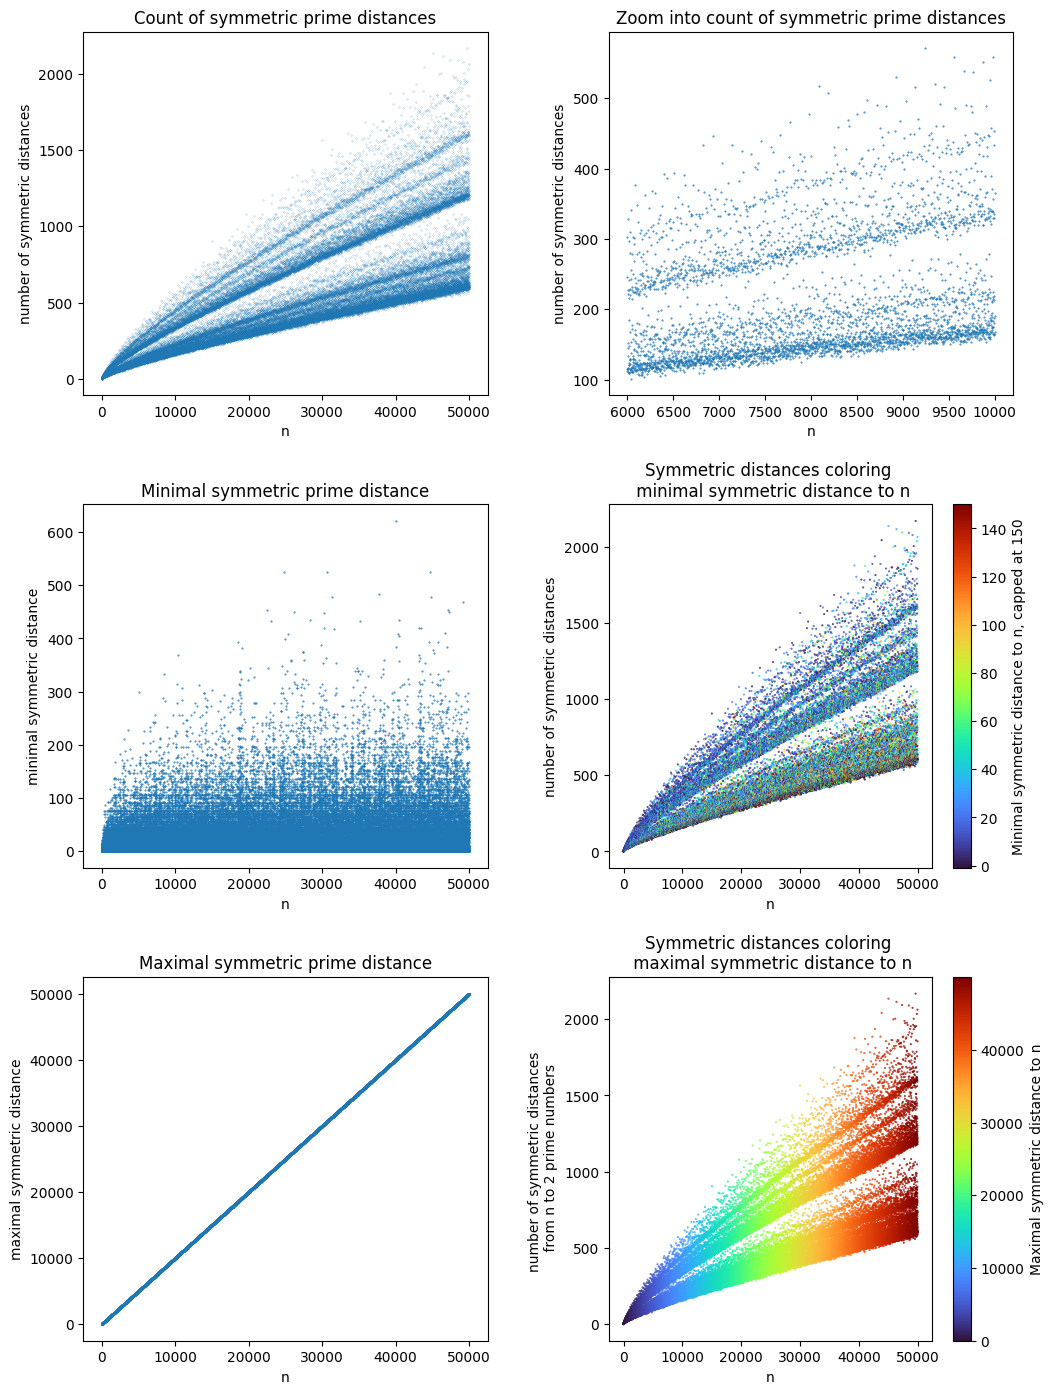

In [100]:
fig, ax = plt.subplots(3,2, figsize=(12,17))


#### count of symmetric distances
# plot counts
ax[0,0].scatter(range(n_lim_distances), count_distances, s=0.02)
ax[0,0].set_xlabel('n')
ax[0,0].set_ylabel('number of symmetric distances')
ax[0,0].set_title('Count of symmetric prime distances')

# zoom into counts
ax[0,1].scatter(range(n_lim_distances)[6000:10000], count_distances[6000:10000], s=0.2)
ax[0,1].set_xlabel('n')
ax[0,1].set_ylabel('number of symmetric distances')
ax[0,1].set_title('Zoom into count of symmetric prime distances')

#### minimum of distribution of symmetric distances

# plot minimal distance per n
ax[1,0].scatter(range(n_lim_distances), min_distances, s=0.2)
ax[1,0].set_xlabel('n')
ax[1,0].set_ylabel('minimal symmetric distance')
ax[1,0].set_title('Minimal symmetric prime distance')

# color plot of minimal distance on symmetric distance plot
p1 = ax[1,1].scatter(range(n_lim_distances), count_distances, c=min_distances, cmap='turbo', vmax=150, s=0.2)
ax[1,1].set_xlabel('n')
ax[1,1].set_ylabel('number of symmetric distances')
ax[1,1].set_title('Symmetric distances coloring \n minimal symmetric distance to n')
cbar = plt.colorbar(p1)
cbar.ax.set_ylabel('Minimal symmetric distance to n, capped at 150')

#### minimum of distribution of symmetric distances

# plot maximal distance per n
ax[2,0].scatter(range(n_lim_distances), max_distances, s=0.2)
ax[2,0].set_xlabel('n')
ax[2,0].set_ylabel('maximal symmetric distance')
ax[2,0].set_title('Maximal symmetric prime distance')

p2 = ax[2,1].scatter(range(n_lim_distances), count_distances, c=max_distances, cmap='turbo', s=0.2)
ax[2,1].set_xlabel('n')
ax[2,1].set_ylabel('number of symmetric distances \n from n to 2 prime numbers')
ax[2,1].set_title('Symmetric distances coloring \n maximal symmetric distance to n')
cbar = plt.colorbar(p2)
cbar.ax.set_ylabel('Maximal symmetric distance to n')

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.savefig(f'../../artifacts/plots/symmetric_distance/symmetric_distance_summary.png', bbox_inches='tight', dpi=200) if saving_figs else ''


**Findings**: <br> <br>
symmetric distance plot has an odd regularities: <br>
- there seems to be a **lower threshold for the lowest possible count of symmetric distances** which seems to follow a function  -> we never reach 0
  *---> proving why this has to be true would be proving the Goldbach conjecture*
- **count of symmetric distances is not uniformly dense**: some counts of symmetric distances appear more often, others are less likely, and they seem to follow a distribution
- the lower distribution part for the count of symmetic distances seem to have **higher minimums** for the lowest symmetric distance for any n


Text(0, 0.5, 'number of symmetric distances \n from n to 2 prime numbers')

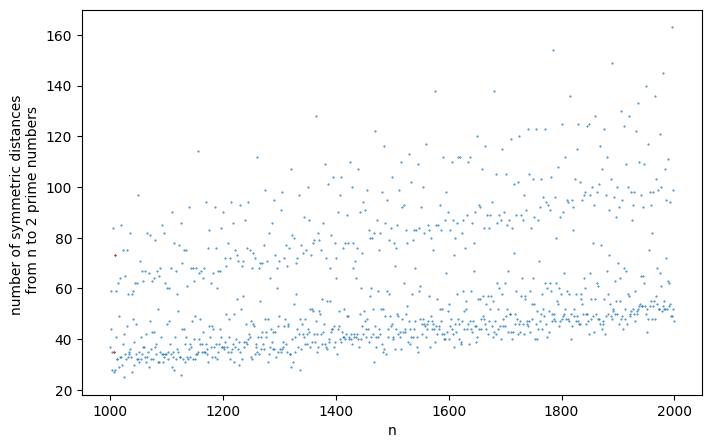

In [29]:
low = 1000
up = 2000

fig, ax = plt.subplots(1,1, figsize=(8,5))
p1 = ax.scatter(range(n_lim_distances)[low:up], count_distances[low:up], s=0.2)
p1 = ax.scatter(range(n_lim_distances)[1007:1009], count_distances[1007:1009], s=0.2, color='r')
ax.set_xlabel('n')
ax.set_ylabel('number of symmetric distances \n from n to 2 prime numbers')

In [6]:
# maybe we can colorcode the primes up until 2014 / 2016, and plot the matching primes around 1007 / 1008

primes_binary = np.zeros(2020)
primes_binary[primes[primes<2020]] = 1

In [7]:
n = 1007

primes_lower_n = primes_binary[:n+1] # including 1007
primes_greater_n = primes_binary[n:2*n+1][::-1]

primes_binary_around_n = np.array([primes_lower_n, primes_greater_n])

# highlighting the symmetric distances
primes_binary_around_n[0][primes_lower_n+primes_greater_n==2] = 2
primes_binary_around_n[1][primes_lower_n+primes_greater_n==2] = 2

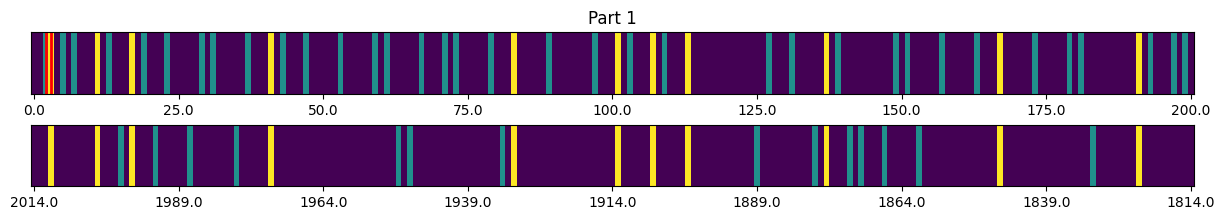

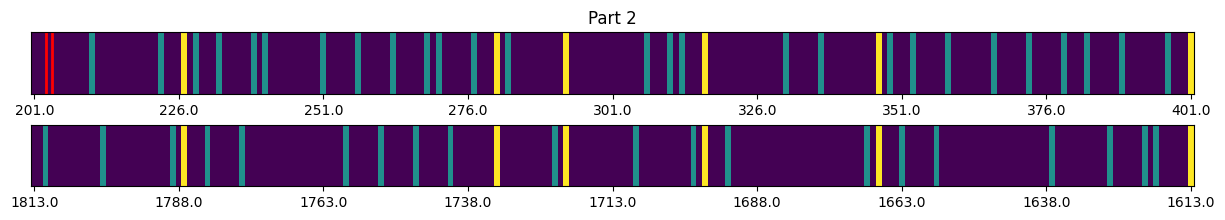

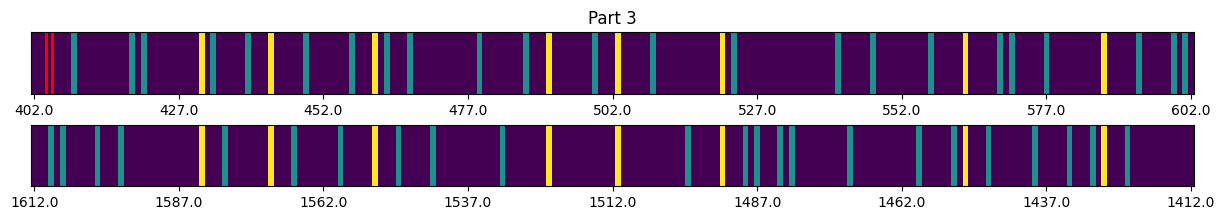

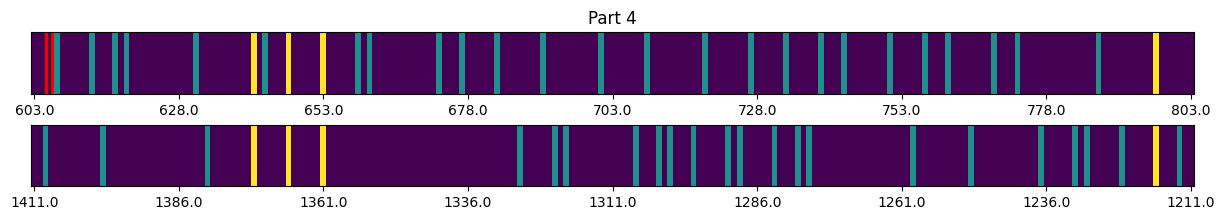

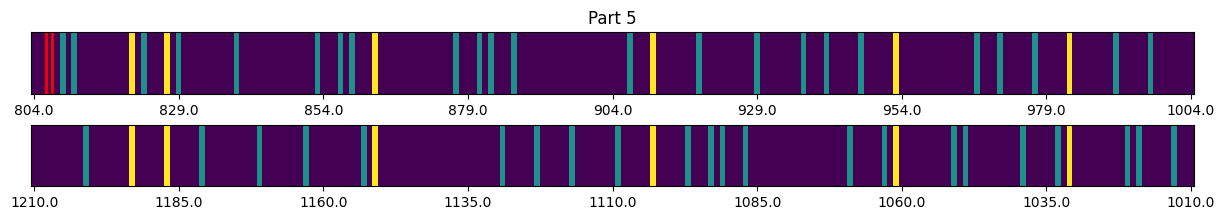

In [26]:
div = 5
breaks = int(primes_binary_around_n.shape[1]/div)

for i in range(div):
    
    fig, ax = plt.subplots(2, 1, figsize=(15, 2))

    if (i+1)*breaks<primes_binary_around_n.shape[1]:
        c1 = ax[0].imshow([primes_binary_around_n[0][i*breaks:(i+1)*breaks]], interpolation='nearest', aspect='auto')
        c2 = ax[1].imshow([primes_binary_around_n[1][i*breaks:(i+1)*breaks]], interpolation='nearest', aspect='auto')
    else:
        c1 = ax[0].imshow([primes_binary_around_n[0][i*breaks:]], interpolation='nearest', aspect='auto')
        c2 = ax[1].imshow([primes_binary_around_n[1][i*breaks:]], interpolation='nearest', aspect='auto')

    c1_xticks  = ax[0].get_xticks()
    c1_xticks = c1_xticks[(c1_xticks>=0) & (c1_xticks<breaks)]
    ax[0].set_xticks(c1_xticks, i*breaks + np.array(c1_xticks))
    
    c2_xticks  = ax[1].get_xticks()
    c2_xticks = c2_xticks[(c2_xticks>=0) & (c2_xticks<breaks)]
    ax[1].set_xticks(c2_xticks, 2*n - i*breaks - np.array(c2_xticks))
    
    ax[0].set_yticks([])
    ax[1].set_yticks([])

    highlight_coords = [(2, -1)]  # Example coordinates

    # Add rectangles to highlight selected squares
    for (ii, jj) in highlight_coords:
        rect = plt.Rectangle((ii, jj), 1, 2, linewidth=2, edgecolor="red", facecolor="none")
        ax[0].add_patch(rect)

    plt.subplots_adjust(hspace=0.5)

    ax[0].set_title(f"Part {i+1}")

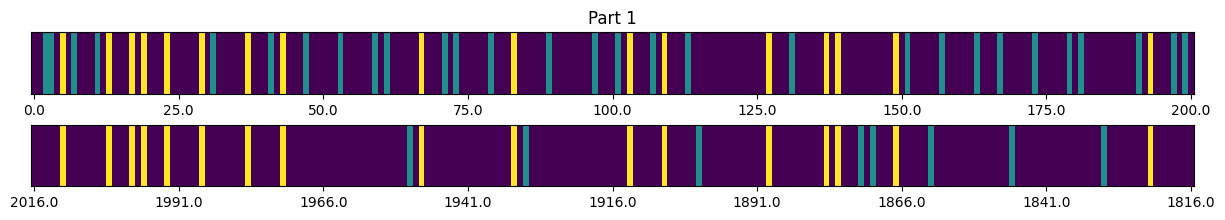

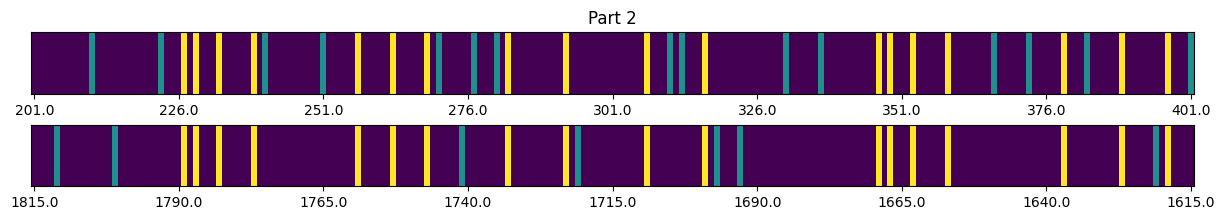

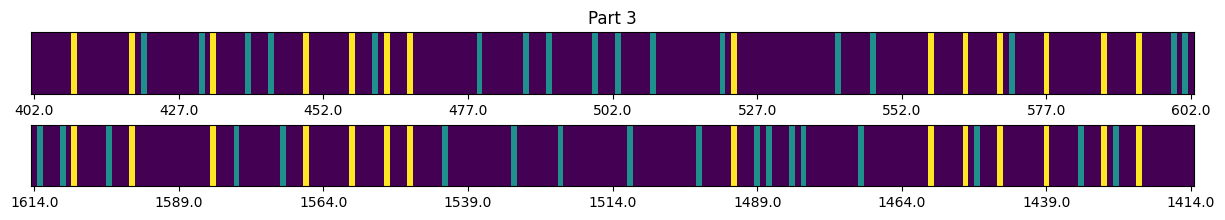

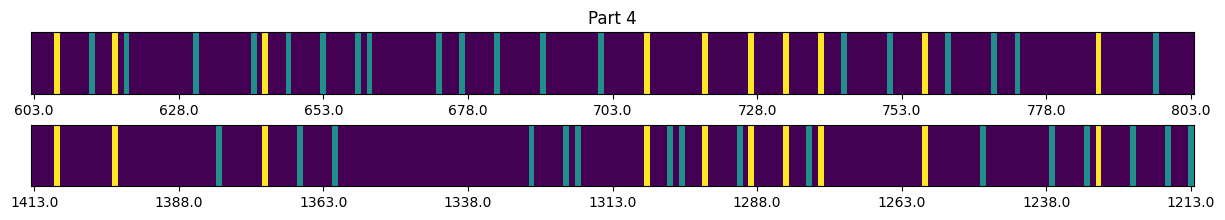

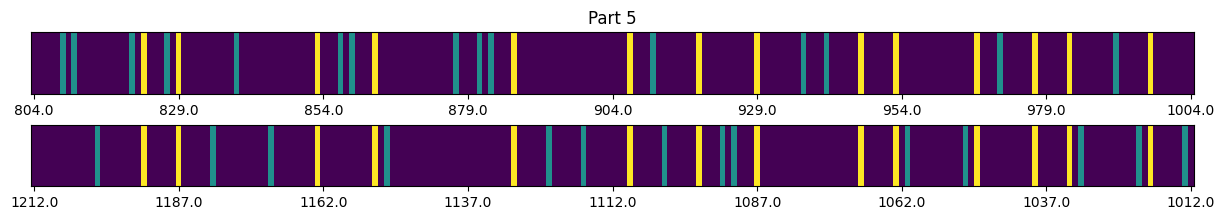

In [99]:
n = 1008

primes_lower_n = primes_binary[:n+1] # including 1007
primes_greater_n = primes_binary[n:2*n+1][::-1]

primes_binary_around_n = np.array([primes_lower_n, primes_greater_n])

# highlighting the symmetric distances
primes_binary_around_n[0][primes_lower_n+primes_greater_n==2] = 2
primes_binary_around_n[1][primes_lower_n+primes_greater_n==2] = 2

div = 5
breaks = int(primes_binary_around_n.shape[1]/div)

for i in range(div):
    
    fig, ax = plt.subplots(2, 1, figsize=(15, 2))

    if (i+1)*breaks<primes_binary_around_n.shape[1]:
        c1 = ax[0].imshow([primes_binary_around_n[0][i*breaks:(i+1)*breaks]], interpolation='nearest', aspect='auto')
        c2 = ax[1].imshow([primes_binary_around_n[1][i*breaks:(i+1)*breaks]], interpolation='nearest', aspect='auto')
    else:
        c1 = ax[0].imshow([primes_binary_around_n[0][i*breaks:]], interpolation='nearest', aspect='auto')
        c2 = ax[1].imshow([primes_binary_around_n[1][i*breaks:]], interpolation='nearest', aspect='auto')

    c1_xticks  = ax[0].get_xticks()
    c1_xticks = c1_xticks[(c1_xticks>=0) & (c1_xticks<breaks)]
    ax[0].set_xticks(c1_xticks, i*breaks + np.array(c1_xticks))
    
    c2_xticks  = ax[1].get_xticks()
    c2_xticks = c2_xticks[(c2_xticks>=0) & (c2_xticks<breaks)]
    ax[1].set_xticks(c2_xticks, 2*n - i*breaks - np.array(c2_xticks))
    
    
    ax[0].set_yticks([])
    ax[1].set_yticks([])
    
    plt.subplots_adjust(hspace=0.5)

    ax[0].set_title(f"Part {i+1}")


(array([2., 1., 1., 3., 0., 0., 3., 0., 2., 2., 2., 3., 1., 1., 2., 1., 2.,
        3., 2., 4.]),
 array([  24.,   73.,  122.,  171.,  220.,  269.,  318.,  367.,  416.,
         465.,  514.,  563.,  612.,  661.,  710.,  759.,  808.,  857.,
         906.,  955., 1004.]),
 <BarContainer object of 20 artists>)

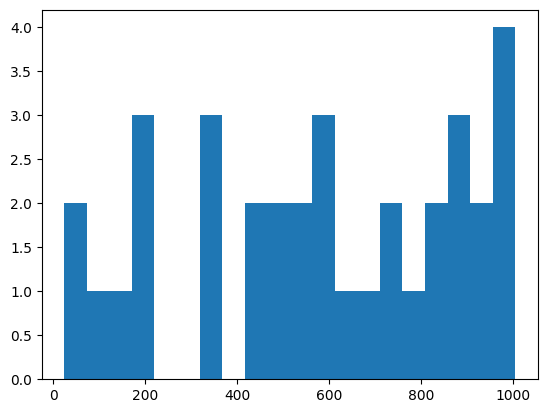

In [33]:
# we have here now 2 examples of the lower and upper curve for prime distances. any differences in distribution?
plt.hist(distances_to_primes[1007], bins=20)

(array([5., 4., 3., 2., 2., 5., 0., 3., 6., 1., 3., 4., 5., 4., 5., 4., 1.,
        5., 3., 8.]),
 array([  11. ,   60.6,  110.2,  159.8,  209.4,  259. ,  308.6,  358.2,
         407.8,  457.4,  507. ,  556.6,  606.2,  655.8,  705.4,  755. ,
         804.6,  854.2,  903.8,  953.4, 1003. ]),
 <BarContainer object of 20 artists>)

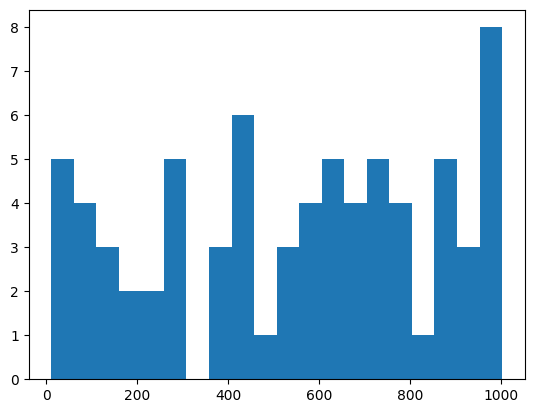

In [36]:
plt.hist(distances_to_primes[1008], bins=20)

#### Do prime twins have anything to do with the regularities in the symmetric distances?

**How would the symmetric distances look like with only prime twin pairs?** <br>
-> if they reveal the same pattern in the symmetric distances, then this would mean that they are super important for this distribution

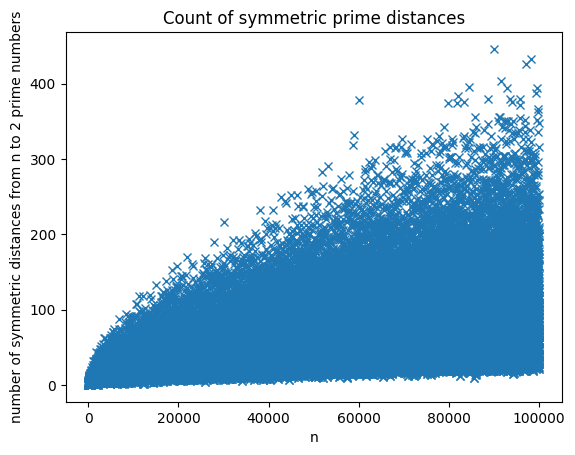

In [14]:
# Calculate prime twins
prime_twins = find_prime_twins(primes)

# plot distances only with prime twins
# -> plot without any correlation
n_twin_lim = 100000
distances_to_twin_primes = [symmetric_prime_number_distances(n, prime_twins) for n in range(n_twin_lim)]

count_twin_distances = [len(dists) for dists in distances_to_twin_primes]
plt.plot(range(n_twin_lim), count_twin_distances, 'x')
plt.xlabel('n')
plt.ylabel('number of symmetric distances from n to 2 prime numbers')
plt.title('Count of symmetric prime distances')
plt.savefig(f'artifacts/plots/prime_twins/n_distances_only_twins.png') if saving_figs else None

**Are the individual lines in the symmetric distance plot connected with the density of prime twins?** 

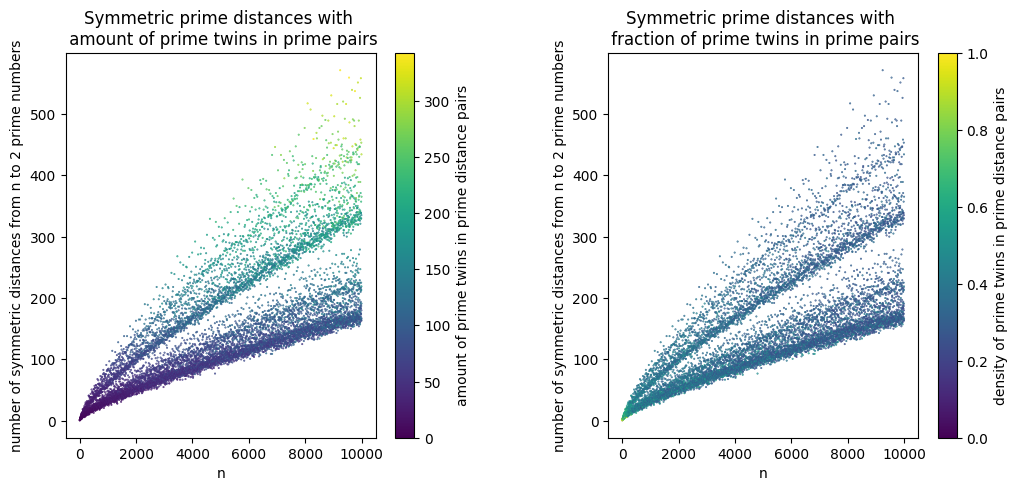

In [17]:
try:
    prime_twin_abundance = np.load(f'../../artifacts/primes/prime_twin_abundance_in_i_10000.npy', allow_pickle=True)
except FileNotFoundError:
    prime_twin_abundance = [prime_twins_in_symmetric_distances(n, distances_to_primes[:2*n], prime_twins[prime_twins<2*n])
                        for n in range(10000)]
    prime_twin_abundance = np.array(prime_twin_abundance)
    prime_twin_abundance = prime_twin_abundance.T
    np.save(f'../../artifacts/primes/prime_twin_abundance_in_i_10000.npy', prime_twin_abundance)

fig, ax = plt.subplots(1,2, figsize=(12,5))
p1 = ax[0].scatter(np.arange(10000), count_distances[:10000], c=prime_twin_abundance[0], s=0.2)
ax[0].set_xlabel('n')
ax[0].set_ylabel('number of symmetric distances from n to 2 prime numbers')
ax[0].set_title('Symmetric prime distances with \n amount of prime twins in prime pairs')
cbar = plt.colorbar(p1)
cbar.ax.set_ylabel('amount of prime twins in prime distance pairs')

p2 = ax[1].scatter(range(10000), count_distances[:10000], c=prime_twin_abundance[1], s=0.2)
ax[1].set_xlabel('n')
ax[1].set_ylabel('number of symmetric distances from n to 2 prime numbers')
ax[1].set_title('Symmetric prime distances with \n fraction of prime twins in prime pairs')
cbar = plt.colorbar(p2)
cbar.ax.set_ylabel('density of prime twins in prime distance pairs')

plt.subplots_adjust(wspace=0.4)
plt.savefig(f'artifacts/plots/prime_twins/n_distances_twin_abundance.png') if saving_figs else None
plt.show()